In [631]:
import numpy as np
from matplotlib import pyplot as plt
from typing import List

In [632]:
np.random.seed(1)

size = np.random.randint(low=100, high=500, size=100)
price = size * 1000 + np.random.randint(low=20000, high=70000, size=100) + 300000

size_test = np.random.randint(low=100, high=500, size=20)
price_test = size_test * 1000 + np.random.randint(low=20000, high=70000, size=20) + 300000


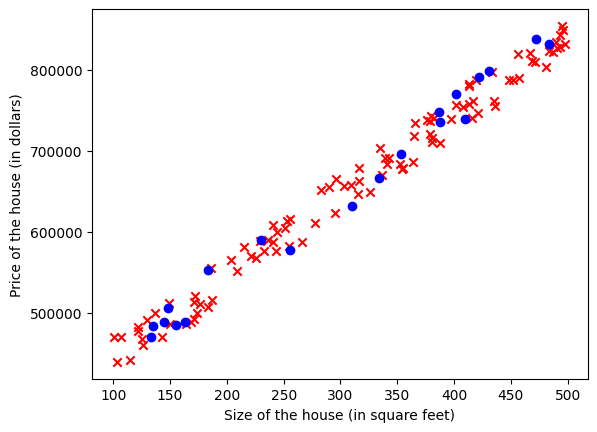

In [633]:
# Plot the training data
plt.scatter(size, price, marker='x', color='r')
plt.xlabel('Size of the house (in square feet)')
plt.ylabel('Price of the house (in dollars)')

# Plot the testing data
plt.scatter(size_test, price_test, marker='o', color='b')
plt.xlabel('Size of the house (in square feet)')
plt.ylabel('Price of the house (in dollars)')
plt.show()


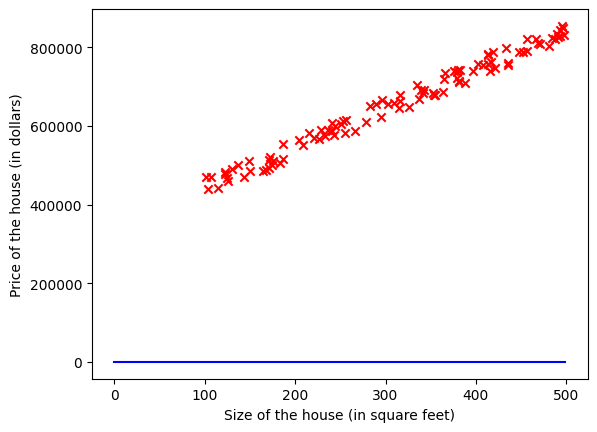

In [634]:
# Regression model
# y = mx + b

# We will initialize the values of m and b to a random value
m = np.random.rand()
b = np.random.rand()

# Plot the initial regression line
plt.plot(m * np.linspace(0, 500, 500) + b, color="b")

# Plot the training data
plt.scatter(size, price, marker="x", color="r")
plt.xlabel("Size of the house (in square feet)")
plt.ylabel("Price of the house (in dollars)")
plt.show()

We for the loss function we will use the Mean Squared Error (MSE) function. The MSE is defined as:

$$
L = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y_i})^2
$$


And the function $\hat{y_i}$ is defined as:

$$
\hat{y_i} = m x_i + b
$$

$$
L = \frac{1}{n} \sum_{i=1}^{n} (y_i - m x_i - b)^2
$$


To do gradient descent we need to calculate the partial derivatives of the loss function with respect to the parameters $m$ and $b$. The partial derivatives are defined as:

$$
\frac{\partial L}{\partial m} = -\frac{2}{n} \sum_{i=1}^{n} (y_i - m x_i - b) (x_i)
$$

$$
\frac{\partial L}{\partial b} = -\frac{2}{n} \sum_{i=1}^{n} (y_i - m x_i - b)
$$





In [635]:
# We will define the learning rate
learning_rate = 0.1

# We will define the number of iterations
num_iterations = 20

def cost(m: float, b: float, size: np.ndarray, price: np.ndarray) -> float:
    return 1 / len(size) * sum((m * size + b - price) ** 2)

def gradient_descent(m: float, b: float, size: np.ndarray, price: np.ndarray, learning_rate: float, num_iterations: int):
    cost_history: List[float] = []
    m_history: List[float] = []
    b_history: List[float] = []

    min_x = min(size)
    max_x = max(size)
    plt.plot([min_x, max_x], [m * min_x + b, m * max_x + b], color="b")


    # We will plot the training data
    plt.scatter(size, price, marker="x", color="r")
    plt.xlabel("Size of the house normalized")
    plt.ylabel("Price of the house normalized")
    plt.show()

    for i in range(num_iterations):
        m_gradient: float = -2 / len(size) * sum(size * (price - (m * size + b)))
        b_gradient: float = -2 / len(size) * sum(price - (m * size + b))

        m -= learning_rate * m_gradient
        b -= learning_rate * b_gradient

        current_cost = cost(m, b, size, price)
        cost_history.append(current_cost)
        m_history.append(m)
        b_history.append(b)

        min_x = min(size)
        max_x = max(size)
        plt.plot([min_x, max_x], [m * min_x + b, m * max_x + b], color="b")


        # We will plot the training data
        plt.scatter(size, price, marker="x", color="r")
        plt.xlabel("Size of the house normalized")
        plt.ylabel("Price of the house normalized")
        plt.show()

    return m, b, cost_history, m_history, b_history


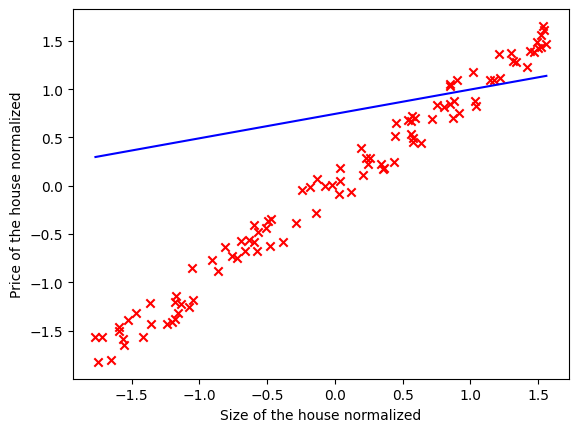

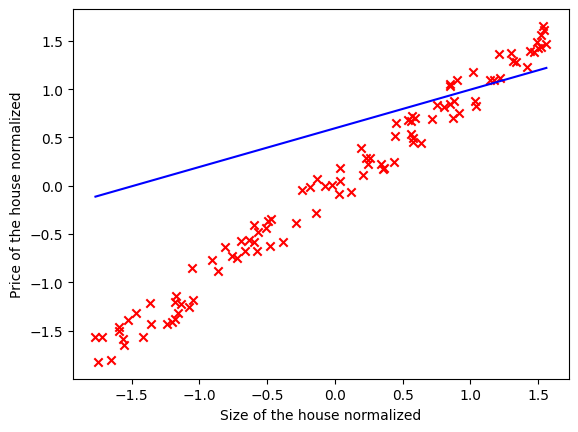

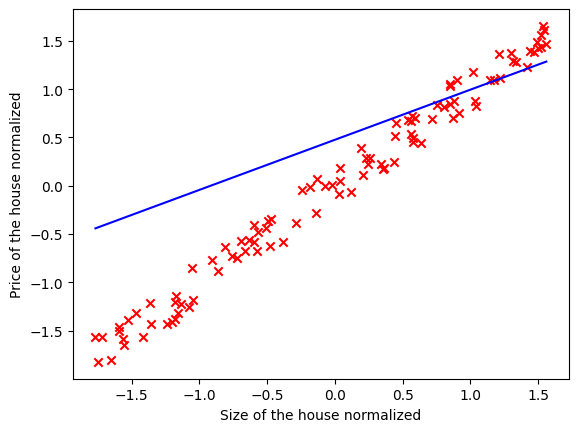

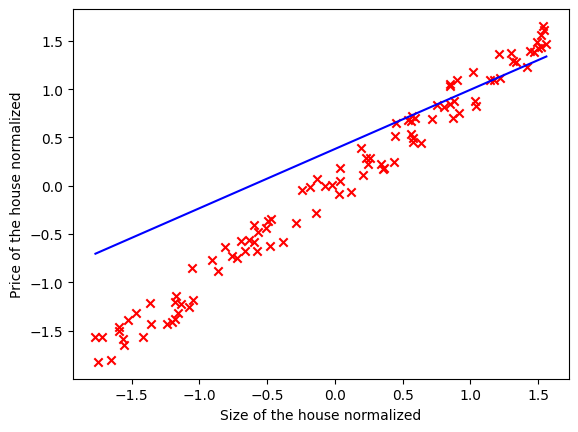

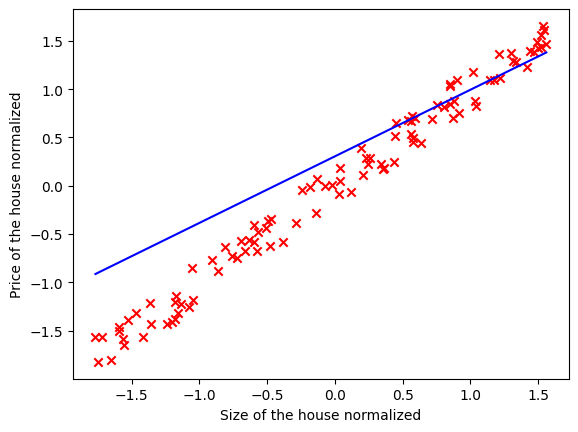

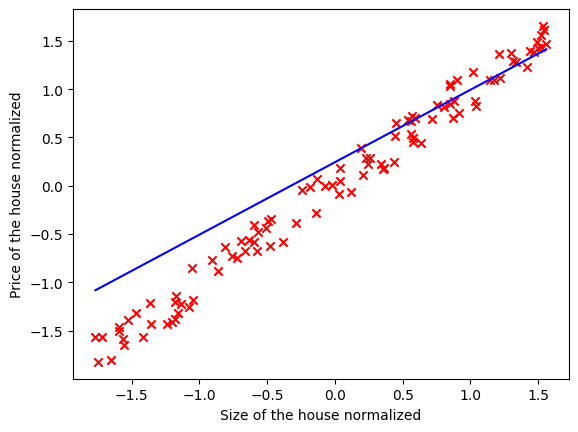

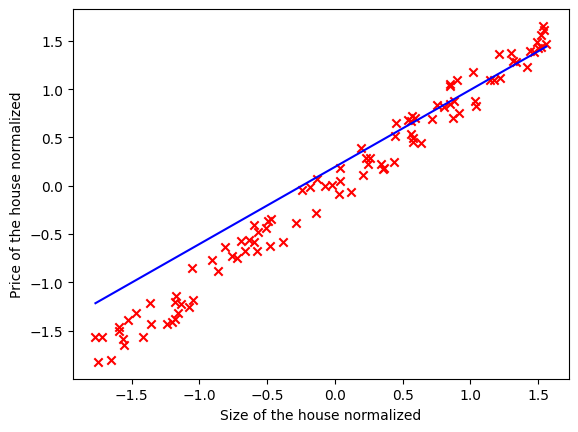

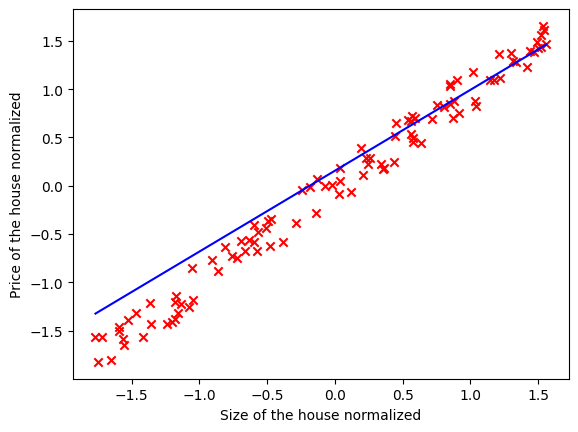

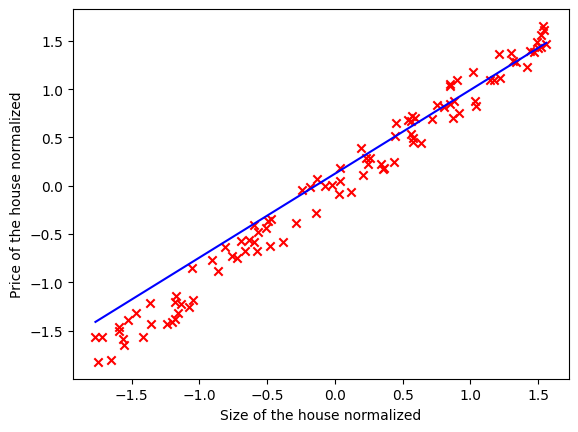

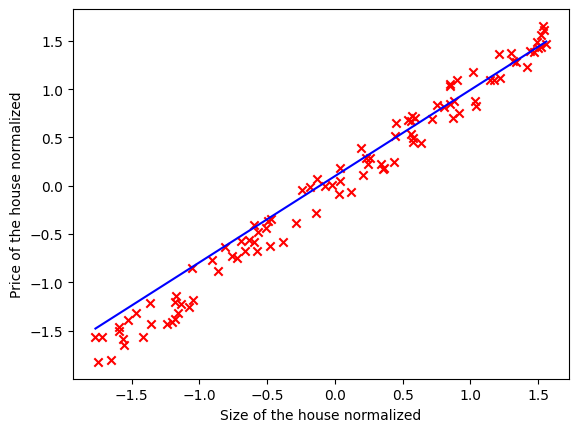

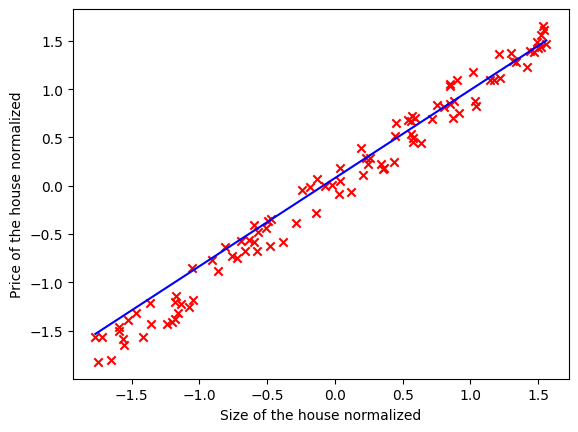

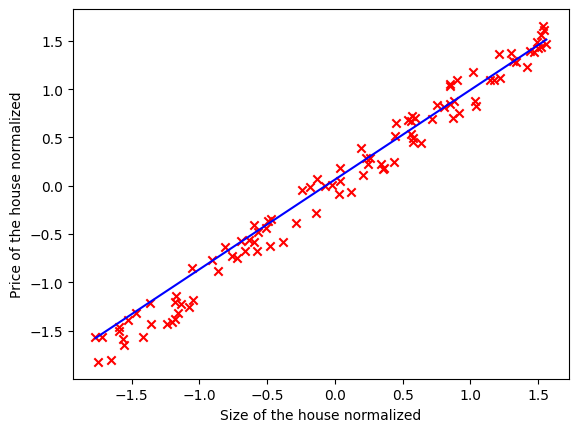

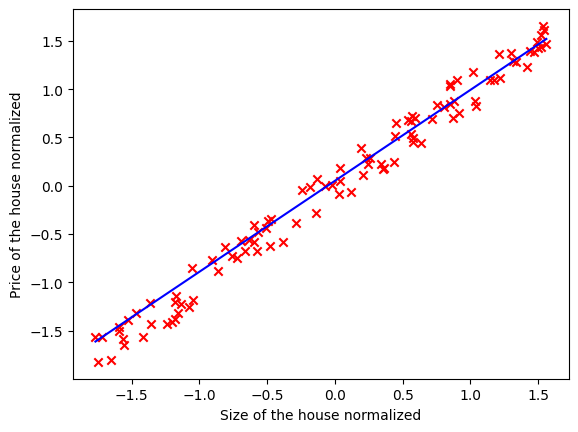

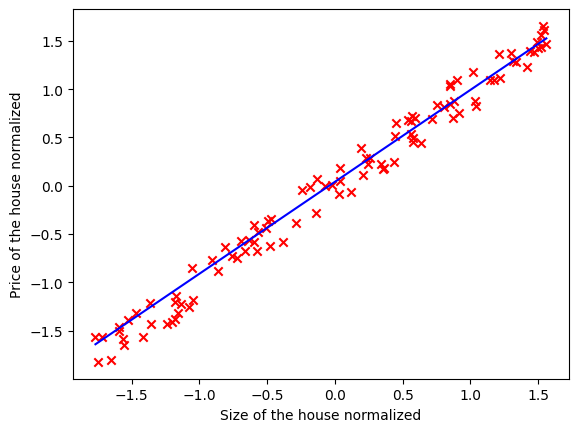

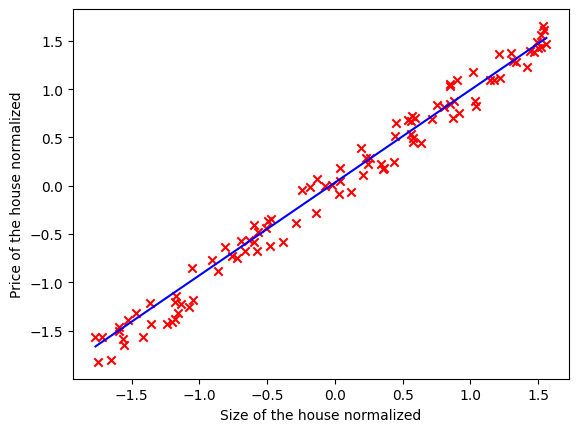

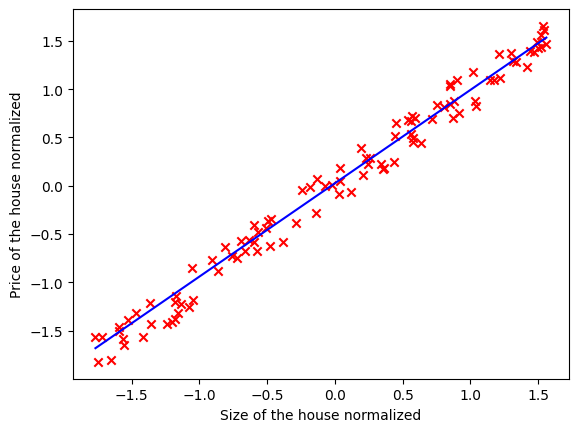

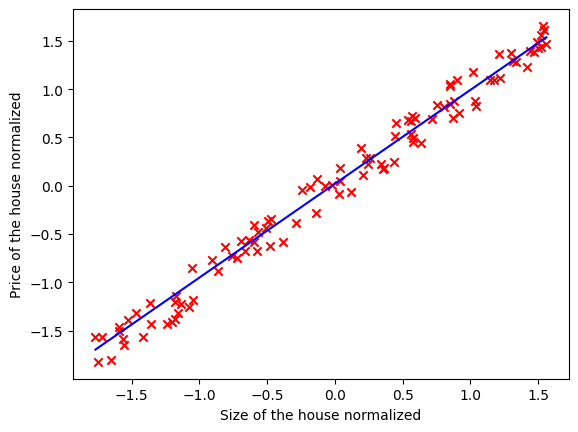

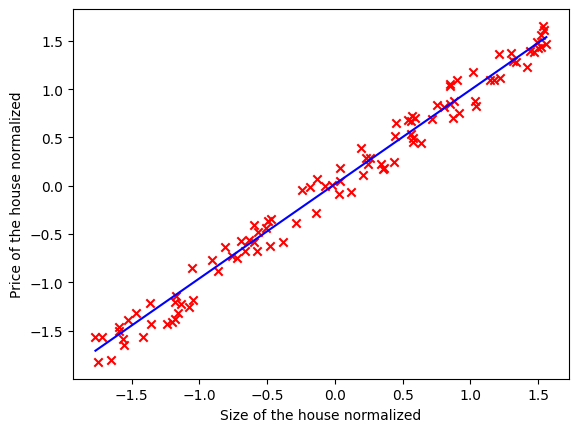

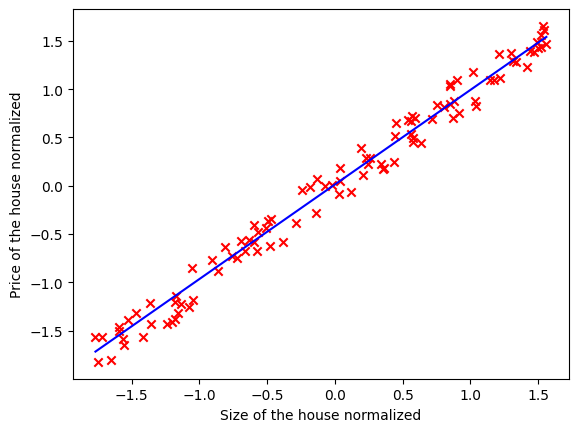

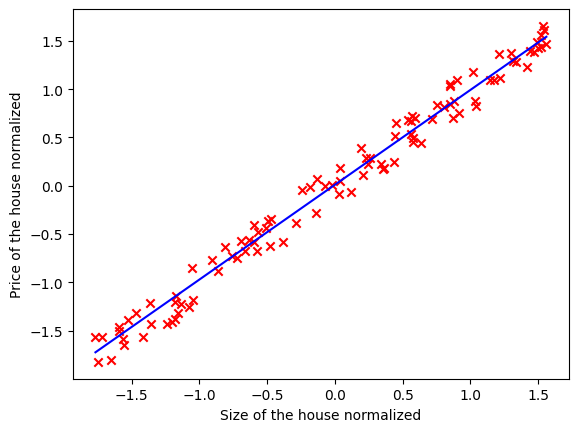

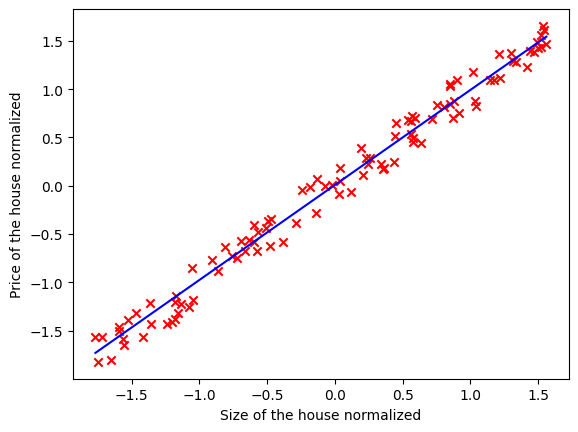

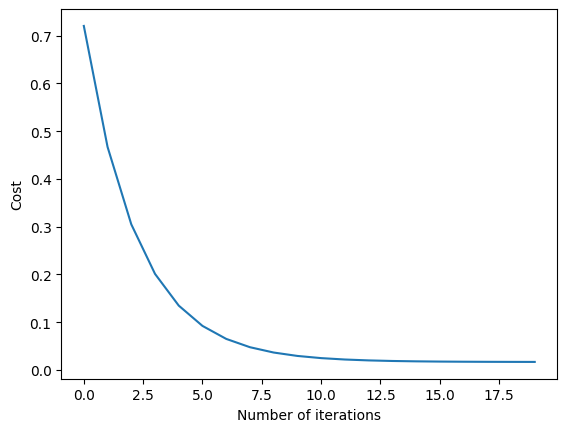

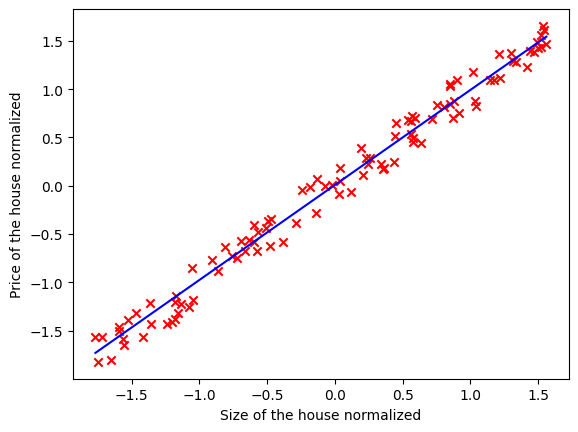

In [636]:
price_normalized: np.ndarray = (price - price.mean()) / price.std()
size_normalized: np.ndarray = (size - size.mean()) / size.std()

# We will call the gradient descent function
m, b, cost_history, m_history, b_history = gradient_descent(m, b, size_normalized, price_normalized, learning_rate, num_iterations)
plt.plot(cost_history)
plt.xlabel("Number of iterations")
plt.ylabel("Cost")
plt.show()

# We will plot the regression line
min_x = min(size_normalized)
max_x = max(size_normalized)
plt.plot([min_x, max_x], [m * min_x + b, m * max_x + b], color="b")


# We will plot the training data
plt.scatter(size_normalized, price_normalized, marker="x", color="r")
plt.xlabel("Size of the house normalized")
plt.ylabel("Price of the house normalized")
plt.show()
